# TP 1 : Apprentissage supervisé

In [36]:
import	numpy	as	np
import	pandas	as	pd
import	warnings
import	matplotlib.pyplot	as	plt
import warnings
warnings.filterwarnings('ignore')


# Chargement des données et préparation :

In [37]:
# données
data = pd.read_csv("C:\\Users\\ordi\\Desktop\\Apprentissage_Auto\\credit_scoring.csv",sep=";")
data.shape
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [38]:
#data = data.reshape((4376,14))
X=data.iloc[:,0:12]
Y=data.iloc[:,13]

In [39]:
X.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0


In [40]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Status, dtype: int64

array([[<AxesSubplot:title={'center':'Seniority'}>,
        <AxesSubplot:title={'center':'Home'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Marital'}>,
        <AxesSubplot:title={'center':'Records'}>,
        <AxesSubplot:title={'center':'Job'}>,
        <AxesSubplot:title={'center':'Expenses'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Assets'}>,
        <AxesSubplot:title={'center':'Debt'}>,
        <AxesSubplot:title={'center':'Amount'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

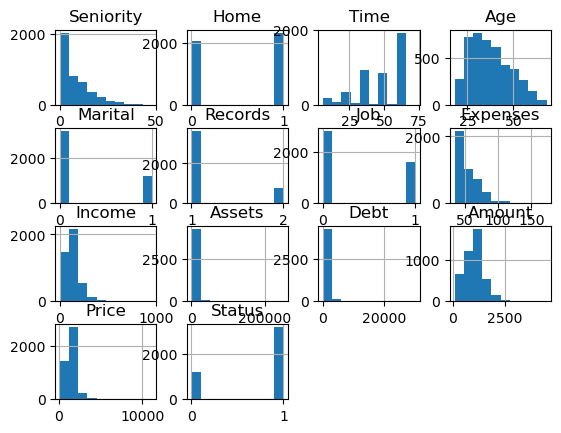

In [42]:
data.hist()

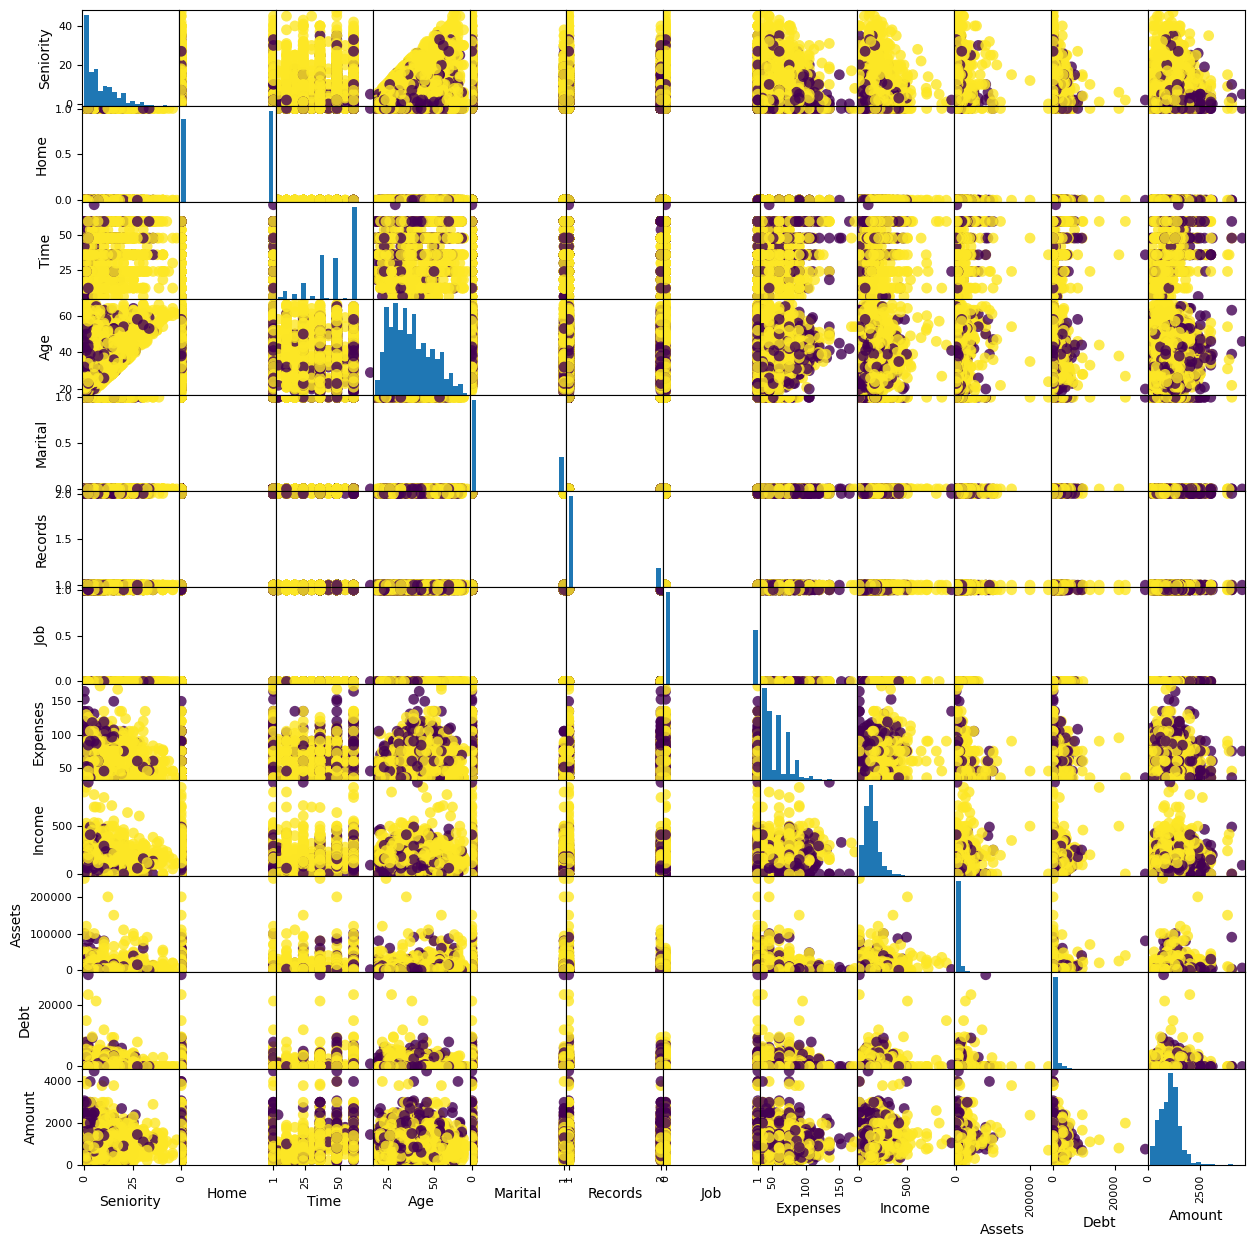

In [43]:
from sklearn.model_selection import train_test_split
import pandas.plotting as pdpl

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#visialisation des données 
#print(" taille données d'apprentissage ",X_train.shape)
#print(" taille données de test  ",X_test.shape)

C=X.columns.tolist()
dataS = pd.DataFrame(X_train, columns=C)

grr = pdpl.scatter_matrix(dataS, 
c=y_train, figsize=(15,15), marker='o', 
hist_kwds={'bins':20}, s=60, alpha = 0.8)

# Apprentissage et évaluation de modèles : 

# 1. Arbre de décision :

Accuracy sur les données d'entraînement avant normalisation par l'arbre de décision : 1.00
Accuracy sur les données de test avant normalisation par l'arbre de décision : 0.73
******************** Arbre de décision  Complète ****************


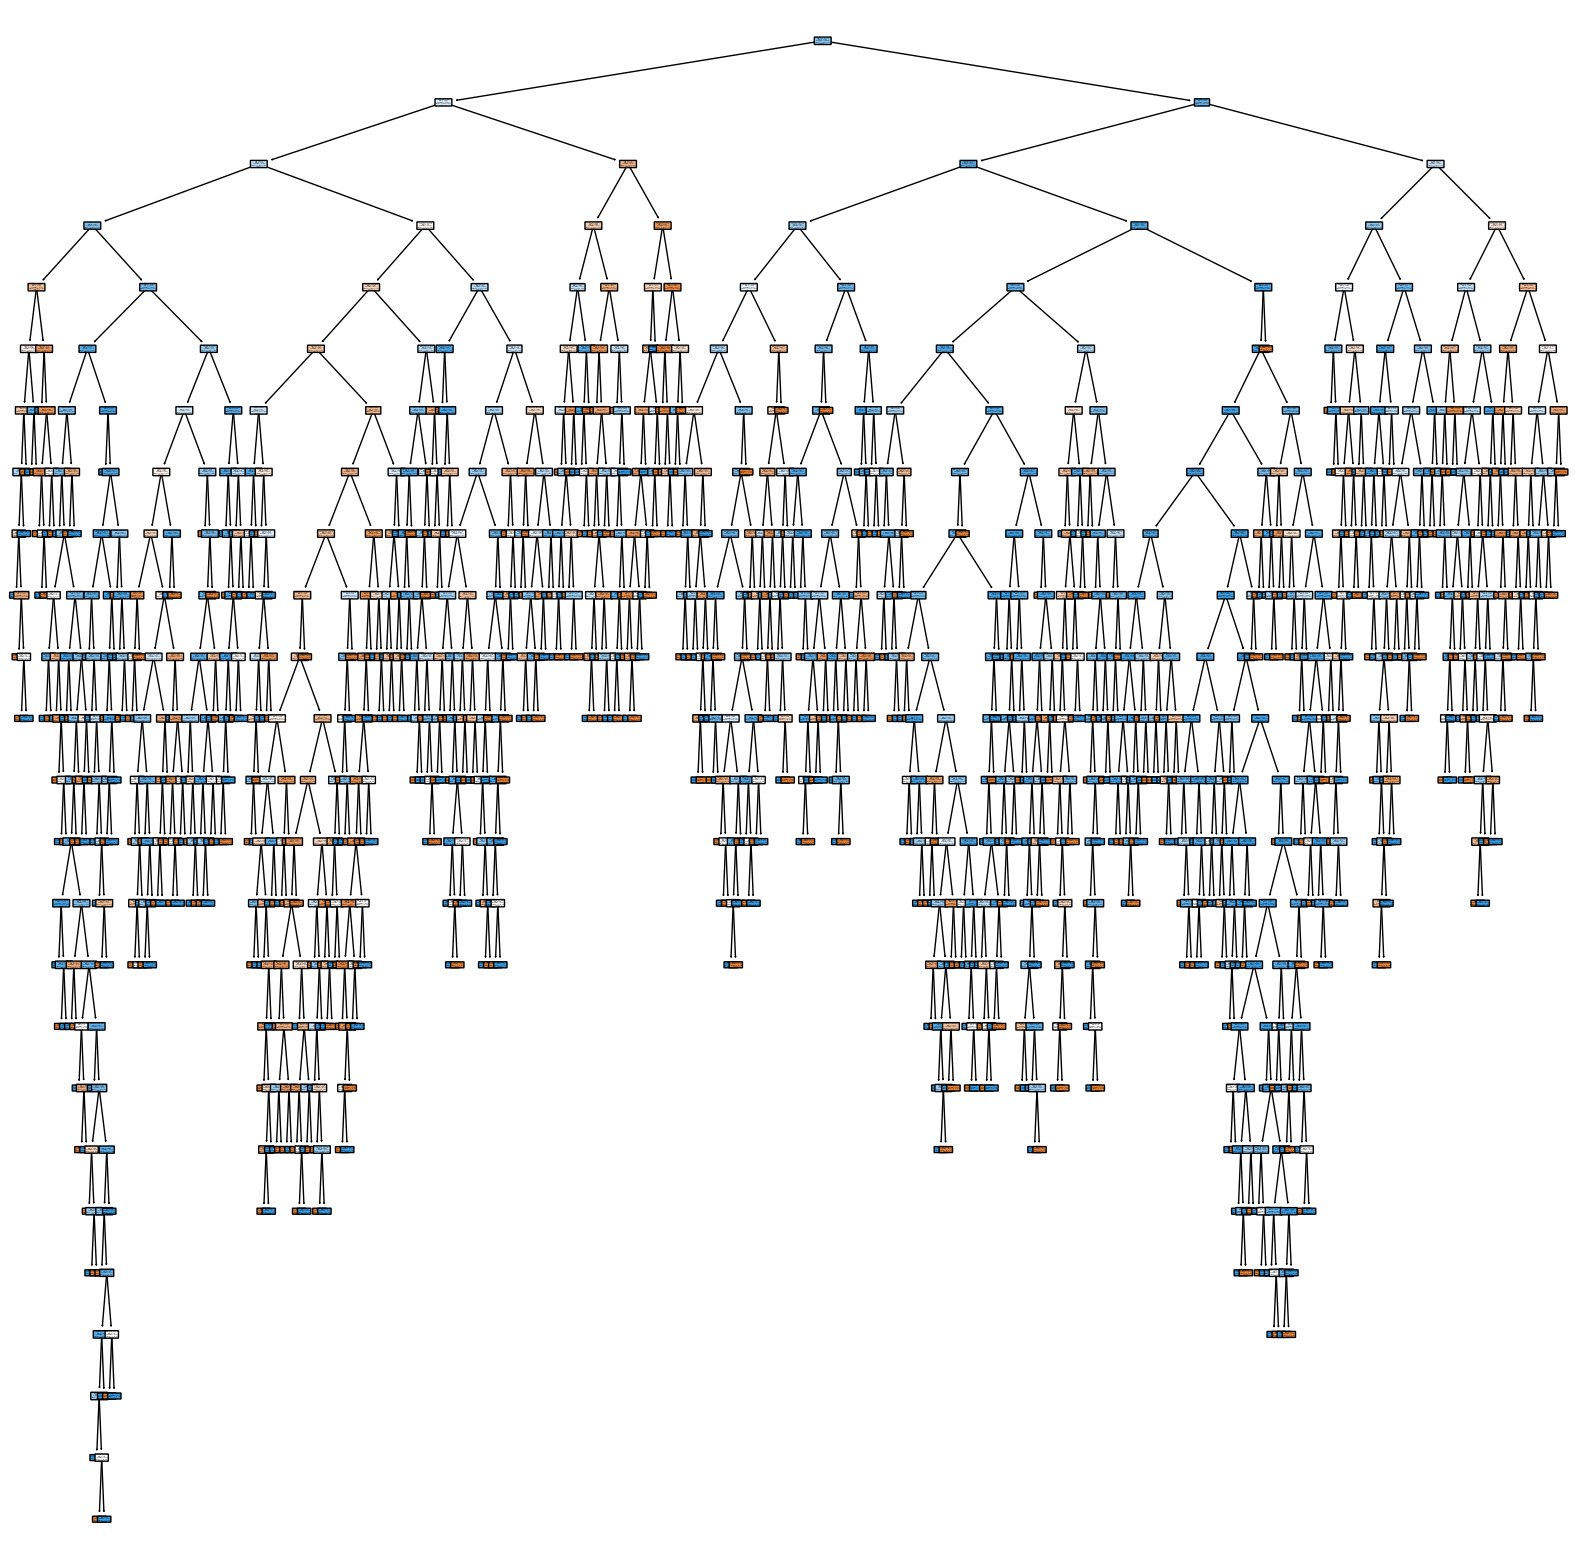

******************** Arbre de décision pour profondeur = 3 ****************
Accuracy sur les données d'entraînement avant normalisation par l'arbre de décision : 0.76
Accuracy sur les données de test avant normalisation par l'arbre de décision : 0.77


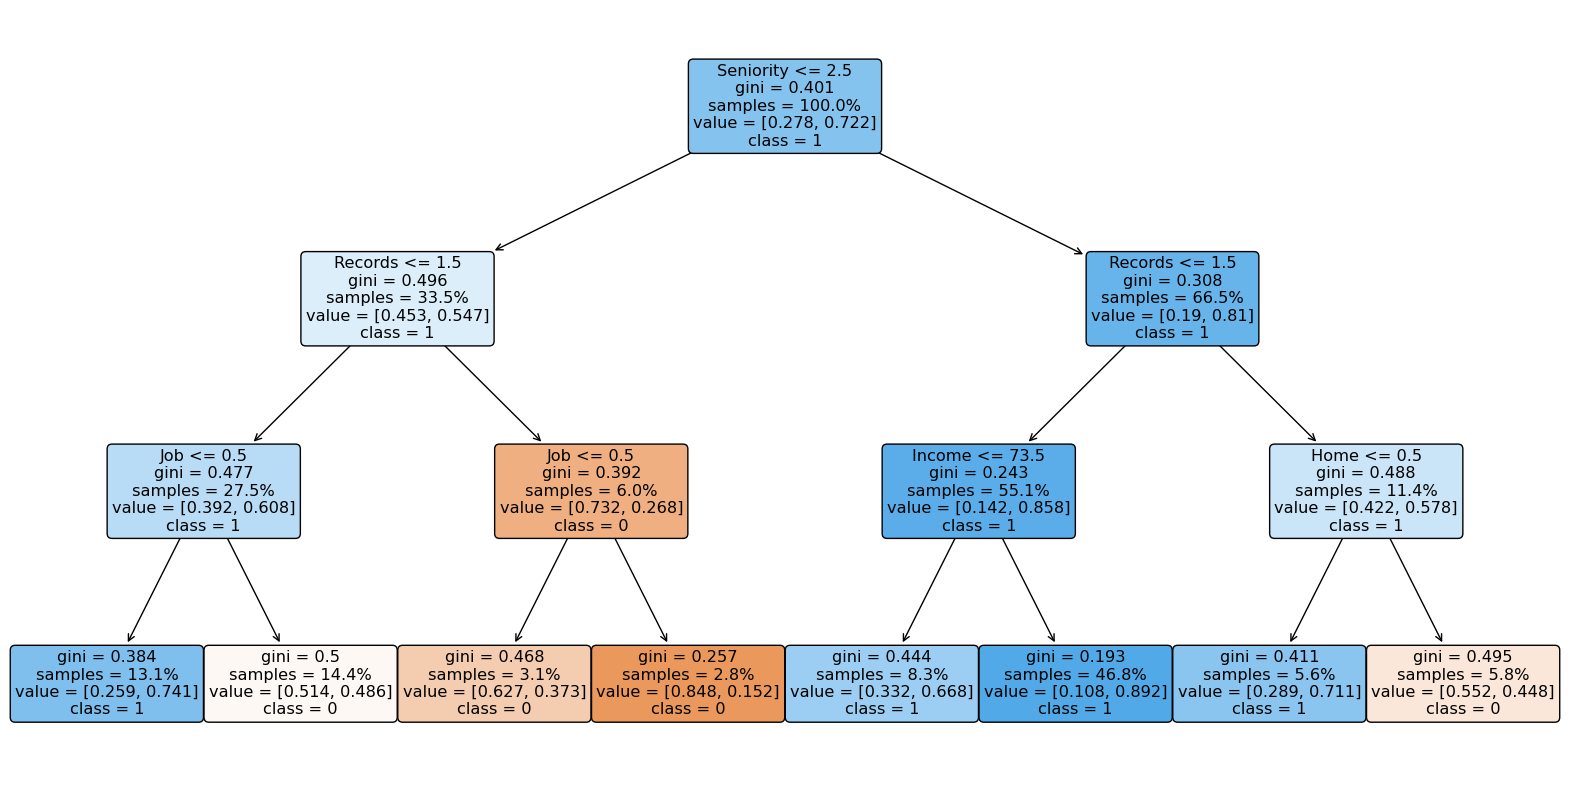

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree


clf =DecisionTreeClassifier()  
clf.fit(X_train,y_train)

y_train_predT =clf.predict(X_train)
y_test_predT =clf.predict(X_test)

train_accuracy_tree = accuracy_score(y_train, y_train_predT)
test_accuracy_tree = accuracy_score(y_test, y_test_predT)

print("Accuracy sur les données d'entraînement avant normalisation par l'arbre de décision : {:.2f}".format(train_accuracy_tree))
print("Accuracy sur les données de test avant normalisation par l'arbre de décision : {:.2f}".format(test_accuracy_tree))

print("******************** Arbre de décision  Complète ****************")

# Affichez l'arbre
plt.figure(figsize=(20,20))  
tree.plot_tree(clf, feature_names=list(X_train.columns), class_names=list(map(str, clf.classes_)), filled=True, rounded=True, proportion=True)
plt.show()

print("******************** Arbre de décision pour profondeur = 3 ****************")

clf1 =DecisionTreeClassifier(max_depth=3)
clf1.fit(X_train,y_train)

y_train_predT1 =clf1.predict(X_train)
y_test_predT1 =clf1.predict(X_test)

train_accuracy_tree1 = accuracy_score(y_train, y_train_predT1)
test_accuracy_tree1 = accuracy_score(y_test, y_test_predT1)

print("Accuracy sur les données d'entraînement avant normalisation par l'arbre de décision : {:.2f}".format(train_accuracy_tree1))
print("Accuracy sur les données de test avant normalisation par l'arbre de décision : {:.2f}".format(test_accuracy_tree1))


# Affichez l'arbre
plt.figure(figsize=(20,10))  
tree.plot_tree(clf1, feature_names=list(X_train.columns), class_names=list(map(str, clf1.classes_)), filled=True, rounded=True, proportion=True)
plt.show()

# 2. K plus proche voisin pour k=5

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy sur les données d'entraînement avant normalisation : {:.2f}".format(train_accuracy))
print("Accuracy sur les données de test avant normalisation : {:.2f}".format(test_accuracy))


Accuracy sur les données d'entraînement avant normalisation : 0.81
Accuracy sur les données de test avant normalisation : 0.70


# K plus proche voisin pour k variable de 1 a 10 : 

Le K le plus optimal est :  9


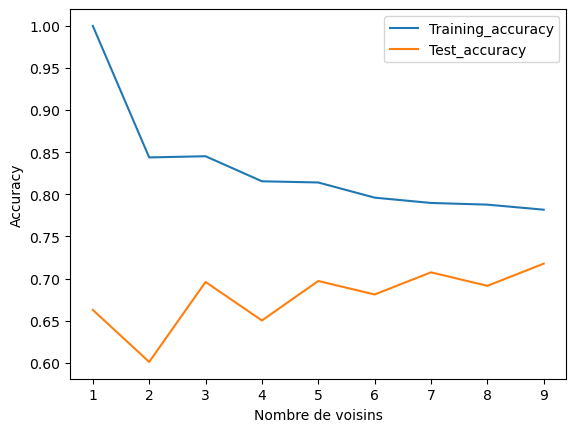

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 

training_accuracy =[]
test_accuracy=[]
K = range(1,10)

for n_neighbors in K :
        knn = KNeighborsClassifier(n_neighbors = n_neighbors)
        knn.fit(X_train,y_train)

        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))

plt.plot(K,training_accuracy,label ="Training_accuracy")
plt.plot(K,test_accuracy,label="Test_accuracy")

plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.legend()

# Définir le k le plus optimal de 1 a 10 

optimal_k = K[test_accuracy.index(max(test_accuracy))]
print("Le K le plus optimal est : ",optimal_k)

# Normalisation des variables continues :

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


scaler1 = MinMaxScaler()
X_train_scaled =scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)



# k plus proche voisin aprés Normalisation : 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

y_train_predN = knn.predict(X_train_scaled)
y_test_predN = knn.predict(X_test_scaled)

train_accuracyN = accuracy_score(y_train, y_train_predN)
test_accuracyN = accuracy_score(y_test, y_test_predN)

print("Accuracy sur les données d'entraînement après normalisation : {:.2f}".format(train_accuracyN))
print("Accuracy sur les données de test après normalisation : {:.2f}".format(test_accuracyN))


Accuracy sur les données d'entraînement après normalisation : 0.82
Accuracy sur les données de test après normalisation : 0.74


# PCA :

In [49]:
from sklearn.decomposition import PCA 

k=3
pca =PCA(n_components=k)
X_train_pca =pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

#Concatination
X_train_cont =np.hstack((X_train_scaled,X_train_pca))
X_test_cont =np.hstack((X_test_scaled,X_test_pca))

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_cont, y_train)

y_train_pred_cont = knn.predict(X_train_cont)
y_test_pred_cont = knn.predict(X_test_cont)

train_accuracy_cont = accuracy_score(y_train_pred, y_train_pred_cont)
test_accuracy_cont = accuracy_score(y_test_pred, y_test_pred_cont)

print("Accuracy sur les données d'entraînement après réduction des données : {:.2f}".format(train_accuracy_cont))
print("Accuracy sur les données de test après réduction des données : {:.2f}".format(test_accuracy_cont))


Accuracy sur les données d'entraînement après réduction des données : 0.80
Accuracy sur les données de test après réduction des données : 0.72


# La validation croisée :

In [50]:
from sklearn.model_selection import cross_val_score,KFold

kfold = KFold(n_splits=5,shuffle=True,random_state=41)
scor = cross_val_score(knn,X,Y,cv=kfold,scoring="accuracy")

print("Score de chaque fold : ",scor)
moy_score= scor.mean()
print("Le score moyen est : ",moy_score)


Score de chaque fold :  [0.73828571 0.70742857 0.70857143 0.71314286 0.74628571]
Le score moyen est :  0.7227428571428571


# Matrice de confusion , Rappel , Précision : 

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Calcule de la matrice ,rappel et précision pour l'arbre de décision

print("********************************** Arbre de décision **********************************")

confusion = confusion_matrix(y_train, y_train_predT)
precision = precision_score(y_train, y_train_predT)
recall = recall_score(y_train, y_train_predT)

print("Matrice de Confusion :")
print(confusion)
print("Précision :", precision)
print("Rappel :", recall)
print("********************************** K plus proche voisin avant Normalisation  **********************************")

confusionV = confusion_matrix(y_train, y_train_pred)
precisionV = precision_score(y_train, y_train_pred)
recallV = recall_score(y_train, y_train_pred)

print("Matrice de Confusion :")
print(confusionV)
print("Précision :", precisionV)
print("Rappel :", recallV)

print("********************************** K plus proche voisin aprés Normalisation  **********************************")

confusionA = confusion_matrix(y_train, y_train_predN)
precisionA = precision_score(y_train, y_train_predN)
recallA = recall_score(y_train, y_train_predN)

print("Matrice de Confusion :")
print(confusionA)
print("Précision :", precisionA)
print("Rappel :", recallA)


********************************** Arbre de décision **********************************
Matrice de Confusion :
[[ 973    0]
 [   1 2526]]
Précision : 1.0
Rappel : 0.999604273842501
********************************** K plus proche voisin avant Normalisation  **********************************
Matrice de Confusion :
[[ 457  516]
 [ 135 2392]]
Précision : 0.8225584594222833
Rappel : 0.9465769687376335
********************************** K plus proche voisin aprés Normalisation  **********************************
Matrice de Confusion :
[[ 559  414]
 [ 212 2315]]
Précision : 0.8482960791498717
Rappel : 0.9161060546102098
